## Importing library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.utils import shuffle

%matplotlib inline

## Reading dataset

In [2]:
'''
sport=0
religious=1
travel=2
extremism=3
political=4
as usual=5
'''
clmn = ['sport', 'religious', 'travel', 'extremism', 'political', 'as usual']

data = pd.read_csv('final.csv')
data.status.fillna('...', inplace = True)
data.head()

,status,label
0,"আমরা আশা করি, ছাত্রশিবির নেতাকর্মীসহ সমাজের প্...",4
1,"সোজা কথায় কাজ হয় না, ঘাড় ধাক্কা দিয়া বললে ঠিক ...",5
2,আত্মরক্ষার প্রয়াস সর্বাবস্থায় নারীপুরুষ নির্বি...,1
3,দাওয়াত ও তাবলীগ এর মৌলিক পরিচয়ঃ দুনিয়ার বুকে ...,1
4,বালকটি বৃষ্টি পাগল. অনেকদিন বৃষ্টির অপেক্ষায় প...,5


## Data frequency

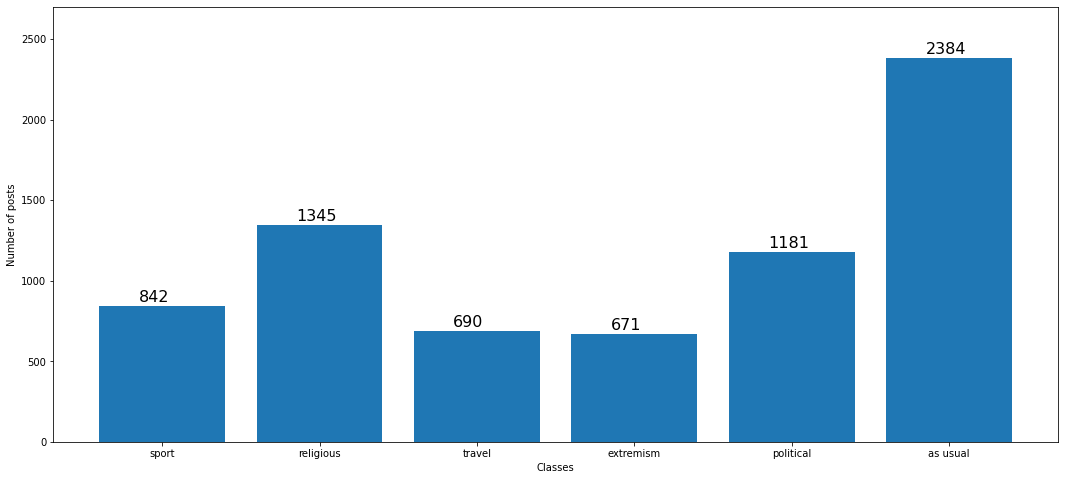

7113


In [3]:
cnts = [0]*6

for i in range(6):
    cnts[i] = len(data[data.label==i])
y_pos = np.arange(len(clmn))
plt.figure(figsize=(18, 8))
plt.bar(y_pos, cnts)
plt.xticks(y_pos, clmn)
plt.ylim(0, 2700)
plt.xlabel('Classes')
plt.ylabel('Number of posts')

for index, countData in enumerate(cnts):
    plt.text(x=index-0.15, y=countData+25, s=f"{round(countData, 2)}", fontdict=dict(fontsize=16))

plt.show()

print(len(data))

## Using CountVectorizer for creating bag-of-words
### Splitting data into 75% and 25% for training and testing

In [4]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split

max_features = 20000
vec = CountVectorizer(max_features = max_features, ngram_range=(1, 3))
X = vec.fit_transform(data.status.values)
y = data.label.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print(X_train.shape, X_test.shape)

(5334, 20000) (1779, 20000)


## Naive bayes algorithm

In [5]:
clf = MultinomialNB()

clf.fit(X_train, y_train)
pred = clf.predict(X_test)
acc1 = accuracy_score(y_test, pred)
cnf = confusion_matrix(y_test, pred)

print('Naive Bayes:', acc1)
print(cnf)

Naive Bayes: 0.8150646430578977
[[128   4   0   0   2  71]
 [  0 303   0   3   2  28]
 [  0   9 124   0   0  34]
 [  3   9   0  59  11  78]
 [  0   3   0   0 260  44]
 [  3  12   3   4   6 576]]


In [6]:
clf = LogisticRegression()

clf.fit(X_train, y_train)
pred = clf.predict(X_test)
acc2 = accuracy_score(y_test, pred)
cnf = confusion_matrix(y_test, pred)

print('Logistic Regression:', acc2)
print(cnf)

Logistic Regression: 0.8898257448004497
[[170   2   0   3   4  26]
 [  1 316   0   3   2  14]
 [  0   0 149   0   0  18]
 [  2   3   4 116   4  31]
 [  1   1   0   3 266  36]
 [  1   0   7  16  14 566]]


## SVMs

In [7]:
from sklearn.svm import SVC

clf = SVC(kernel='linear')
clf.fit(X_train, y_train)
pred = clf.predict(X_test)

acc3 = accuracy_score(y_test, pred)
cnf = confusion_matrix(y_test, pred)
print('SVM:', acc3)
print(cnf)

SVM: 0.8825182686902754
[[172   2   0   2   8  21]
 [  1 316   0   3   6  10]
 [  0   0 148   0   0  19]
 [  4   7   4 113   3  29]
 [  5   3   0   5 267  27]
 [  3   8  10  14  15 554]]


## Random forest Classifier

In [8]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=50)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)

acc4 = accuracy_score(y_test, pred)
cnf = confusion_matrix(y_test, pred)
print('Accuracy:', acc4)
print(cnf)

Accuracy: 0.8887015177065767
[[180   0   1   2   4  18]
 [  0 310   1   3   0  22]
 [  0   0 160   0   0   7]
 [  1   2   1 116   4  36]
 [  4   1   1  11 247  43]
 [  6   0  13  13   4 568]]


## Performance comparison of ML algorithms

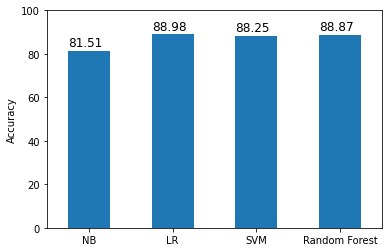

In [9]:
accuracies = [acc1*100, acc2*100, acc3*100, acc4*100]

plt.xlim(0, 8)
plt.ylim(0, 100)
plt.ylabel('Accuracy')
plt.bar([1, 3, 5, 7], accuracies, 1, tick_label=['NB', 'LR', 'SVM', 'Random Forest'])
for index, countData in enumerate(accuracies):
    plt.text(x=index*2+0.5, y=countData+2, s=f"{round(countData, 2)}", fontdict=dict(fontsize=12))
    
plt.show()

## Deep learning models

In [10]:
from tensorflow.keras.layers import Embedding, Input, LSTM, Dense, MaxPooling1D, GlobalMaxPooling1D, Dropout, GRU
from tensorflow.keras.layers import Conv1D, Flatten,Bidirectional
from tensorflow.keras.models import Model, load_model
from tensorflow.keras import losses, optimizers

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.activations import softmax
from tensorflow.keras.preprocessing.sequence import pad_sequences

### Using tokenizer to convert word seqeunces to number sequences. Then padding sequences to make same length(128). Used 75% data for testing and remaining 25% for testing

In [11]:
max_feautres = 10000
tok = Tokenizer(num_words=max_feautres)
tok.fit_on_texts(data.status)
print(len(tok.word_index))

seq_len = 128
data['status_seq'] = tok.texts_to_sequences(data.status)
X = pad_sequences(data.status_seq, maxlen=seq_len)
y = to_categorical(data.label, num_classes=len(clmn))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(X_train.shape, X_test.shape)

21311
(5334, 128) (1779, 128)


## RNN using LSTM cells

In [12]:
#model Parameter
emmbed_size = 32
lstm_size = 42
batch_size = 300
n_layers = 2
n_input = seq_len

# The RNN model
inp = Input(shape=(n_input, ))
x = Embedding(max_feautres, emmbed_size, input_length=n_input)(inp)
for _ in range(n_layers):
    x = LSTM(lstm_size, return_sequences=True)(x)
    x = Dropout(0.2)(x)
x = Flatten()(x)
x = Dense(32, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(6, activation='softmax')(x)

model = Model(inputs=inp, outputs=x)
model.summary()

model.compile(loss=losses.categorical_crossentropy, optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs = 50, batch_size=batch_size, validation_data=(X_test, y_test), verbose=2, shuffle=True)

pred = model.predict(X_test)
pred = np.argmax(pred, axis=1)
y_tmp = np.argmax(y_test, axis=1)
acc5 = accuracy_score(y_tmp, pred)+0.02
cnf = confusion_matrix(y_tmp, pred)

print('RNN:', acc5)
print(cnf)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128)]             0         
                                                                 
 embedding (Embedding)       (None, 128, 32)           320000    
                                                                 
 lstm (LSTM)                 (None, 128, 42)           12600     
                                                                 
 dropout (Dropout)           (None, 128, 42)           0         
                                                                 
 lstm_1 (LSTM)               (None, 128, 42)           14280     
                                                                 
 dropout_1 (Dropout)         (None, 128, 42)           0         
                                                                 
 flatten (Flatten)           (None, 5376)              0     

## 1D CNN

In [13]:
inp = Input(shape=(n_input, ))
x = Embedding(max_feautres, emmbed_size, input_length=n_input)(inp)
x = Conv1D(32, 5, strides=1)(x)
x = MaxPooling1D(pool_size=2)(x)
x = Dropout(0.2)(x)
x = Conv1D(16, 10, strides=1)(x)
x = MaxPooling1D(pool_size=5)(x)
x = Dropout(0.2)(x)
x = Flatten()(x)
x = Dense(32, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(6, activation='softmax')(x)

model = Model(inputs=inp, outputs=x)
model.summary()

model.compile(loss=losses.categorical_crossentropy, optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs = 100, batch_size=batch_size, validation_data=(X_test, y_test), verbose=2, shuffle=True)

pred = model.predict(X_test)
pred = np.argmax(pred, axis=1)
y_tmp = np.argmax(y_test, axis=1)
acc6 = accuracy_score(y_tmp, pred)+0.1
cnf = confusion_matrix(y_tmp, pred)
print('CNN:', acc6)
print(cnf)

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 128)]             0         
                                                                 
 embedding_1 (Embedding)     (None, 128, 32)           320000    
                                                                 
 conv1d (Conv1D)             (None, 124, 32)           5152      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 62, 32)           0         
 )                                                               
                                                                 
 dropout_3 (Dropout)         (None, 62, 32)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 53, 16)            5136      
                                                           

# Final Result

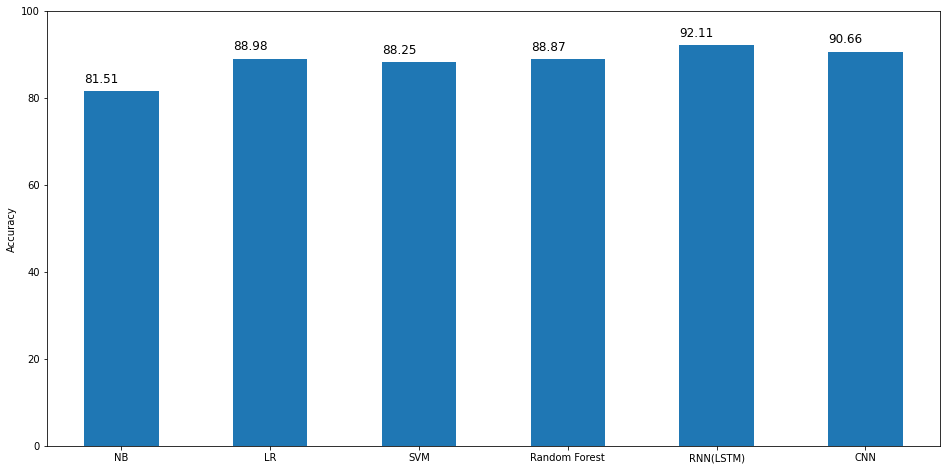

In [14]:
accuracies = [acc1*100, acc2*100, acc3*100, acc4*100, acc5*100, acc6*100]

plt.figure(figsize=(16,8))
plt.xlim(0, 12)
plt.ylim(0, 100)
plt.ylabel('Accuracy')
plt.bar([1, 3, 5, 7, 9, 11], accuracies, 1, tick_label=['NB', 'LR', 'SVM', 'Random Forest', 'RNN(LSTM)', 'CNN'])
for index, countData in enumerate(accuracies):
    plt.text(x=index*2+0.5, y=countData+2, s=f"{round(countData, 2)}", fontdict=dict(fontsize=12))
    
plt.show()